In [1]:
import sys
import os
# Adding the notebook directory to the sys path
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src = os.path.dirname(notebook_dir)
sys.path.append(os.path.join(src))
from src.event import Event
from src.visualization import plot_probability_distribution,plot_distribution, plot_utility_distribution, plot_decision_utility_distribution
from src.decision import Decision
from src.outcome import Outcome
from src.decision_evaluation import evaluate_decision
import numpy as np
import time

In [2]:
start_time = time.time()

# Step 1: Define and visualize individual probabilistic events

## E1: Friend1 comes

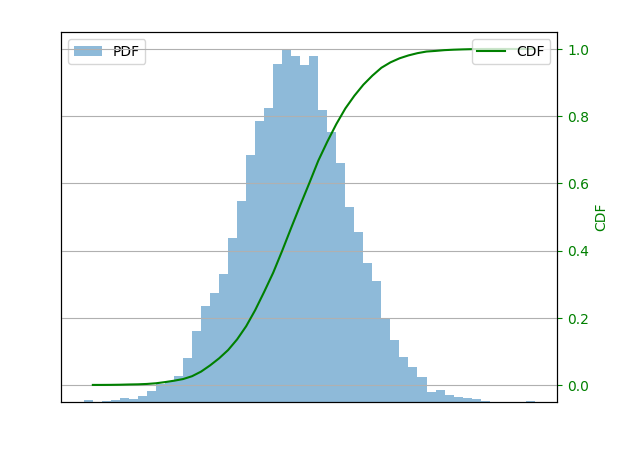

In [3]:
E1 = Event("E1", "normal", {'mean': 0.3, 'std': 0.1}, lambda x: -2*x)
plot_probability_distribution(E1.sample(), "Probability of E1 occuring")

## NE1: Friend1 doesn't come

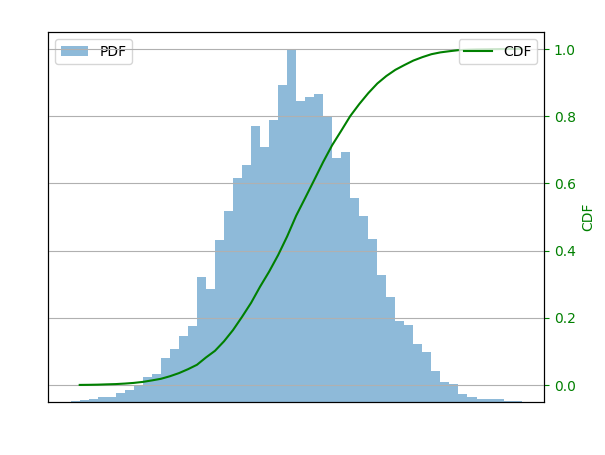

In [4]:
NE1= E1.complementary_event()
plot_probability_distribution(NE1.sample(), "Probability of NE1")

## Event 2: Friend 2 comes

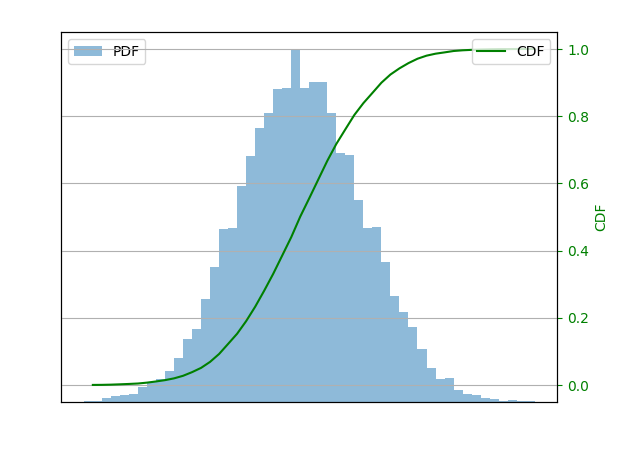

In [5]:
E2 = Event("E2", "normal", {'mean': 0.6, 'std': 0.1}, lambda x: 2*x)
plot_probability_distribution(E2.sample(), "Probability of E2 occuring")

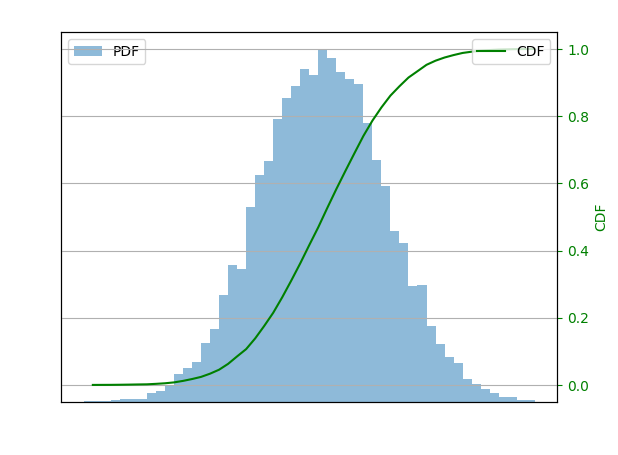

In [6]:
NE2 = E2.complementary_event()
plot_probability_distribution(NE2.sample(), "Probability of event 2 not occuring")

## Event 3: Me coming

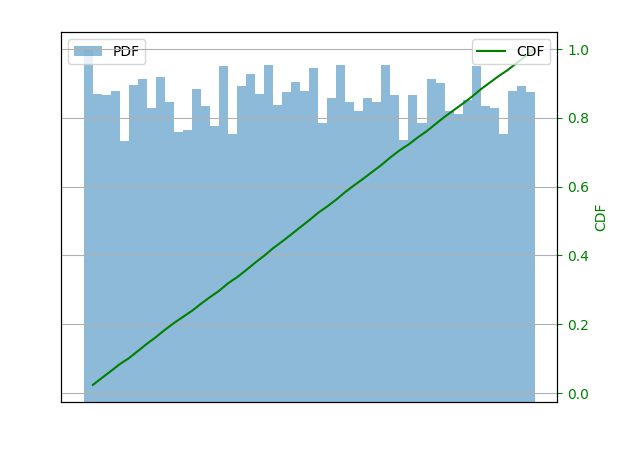

In [7]:
E3 = Event("E3", "uniform", {'start': 0, 'end': 1}, lambda x: 1*x)
plot_probability_distribution(E3.sample(), "Probability of  E3 occuring")

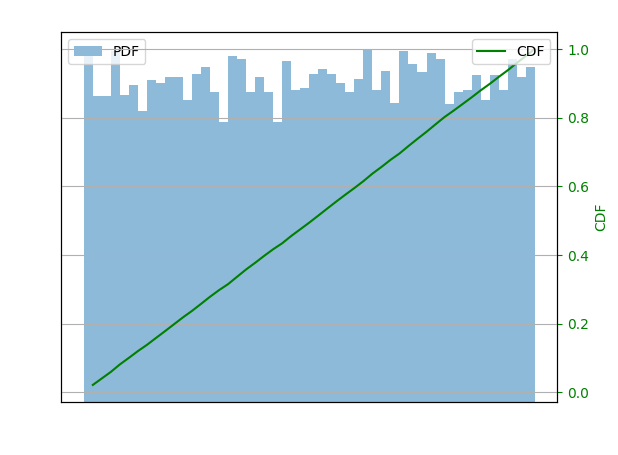

In [8]:
NE3 = E3.complementary_event()
plot_probability_distribution(NE3.sample(), "Probability of event 3 not occuring")


# Step 5: Define utility function 


# Step 6: Define Decisions and Outcomes

## Step 6.1: Define Decisions

In [9]:
decision1 = Decision("Buying my train ticket")
decision2 = Decision("Not buying my train ticket")

## Step 6.2: Define Outcomes

### Outcome 1: E1&E2&E3

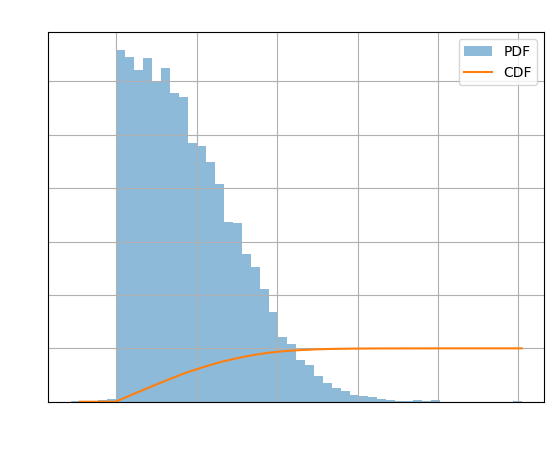

Statistics for Distribution of E1&E2&E3:
  Mean: 0.09
  Median: 0.08
  Standard Deviation: 0.07
  25th percentile: 0.04
  75th percentile: 0.13


In [10]:
outcome_title = "E1&E2&E3"

def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [E1,E2,E3], combine_formula, lambda x : 0.3*x)
outcome1=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)



### Outcome2: E1&E3&NE3

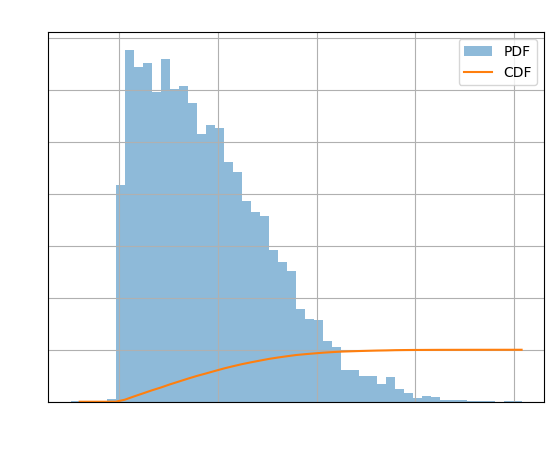

Statistics for Distribution of E1&E3&NE3:
  Mean: 0.09
  Median: 0.08
  Standard Deviation: 0.06
  25th percentile: 0.04
  75th percentile: 0.13


In [11]:
outcome_title = "E1&E3&NE3"




outcome = Outcome(outcome_title,  decision2, [E1,E2,NE3], lambda x,y,z:x*y*z, lambda x : 2*x)
outcome2=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


### Outcome 3: E1&NE2&E3

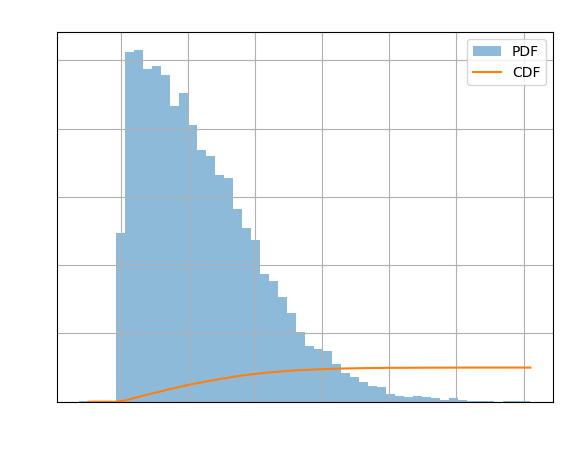

Statistics for Distribution of E1&E3&NE3:
  Mean: 0.06
  Median: 0.05
  Standard Deviation: 0.05
  25th percentile: 0.02
  75th percentile: 0.09


In [12]:
outcome_title = "E1&E3&NE3"
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [E1,NE2,E3], combine_formula, lambda x: -1*x)
outcome3=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


### Outcome 4: E1&NE2&NE3

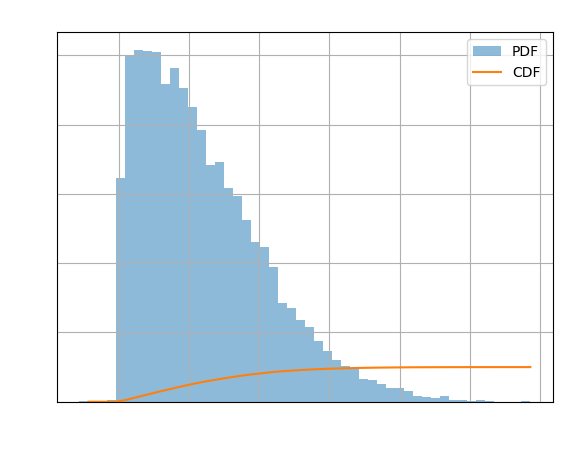

Statistics for Distribution of E1&NE2&NE3:
  Mean: 0.06
  Median: 0.05
  Standard Deviation: 0.05
  25th percentile: 0.02
  75th percentile: 0.09


In [13]:
outcome_title = "E1&NE2&NE3"

def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision2, [E1,NE2,NE3], combine_formula,  lambda x: x)
outcome4=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


### Outcome 5: NE1&E2&E3

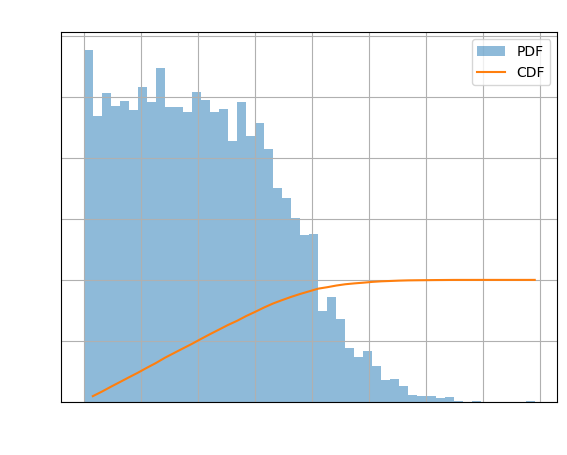

Statistics for Distribution of NE1&E2&E3:
  Mean: 0.21
  Median: 0.20
  Standard Deviation: 0.13
  25th percentile: 0.10
  75th percentile: 0.31


In [14]:
outcome_title = "NE1&E2&E3"

def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [NE1,E2,E3], combine_formula,  lambda x: 4*x)
outcome5=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


### Outcome 6: NE1&E2&NE3

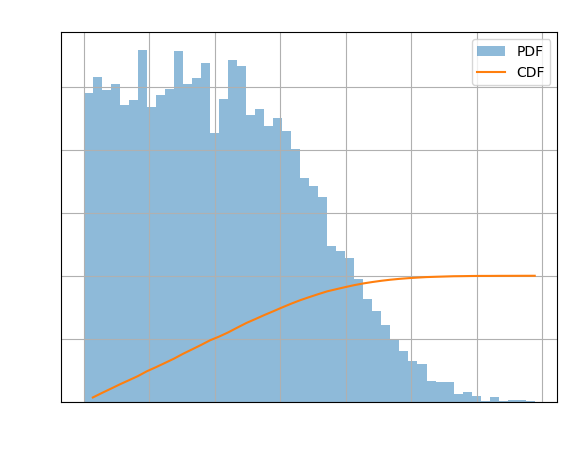

Statistics for Distribution of NE1&E2&NE3:
  Mean: 0.21
  Median: 0.20
  Standard Deviation: 0.13
  25th percentile: 0.10
  75th percentile: 0.30


In [15]:
outcome_title = "NE1&E2&NE3"

def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title,  decision2, [NE1,E2,NE3], combine_formula,  lambda x: 1*x)
outcome6=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


### Outcome 7: NE1&NE2&E3

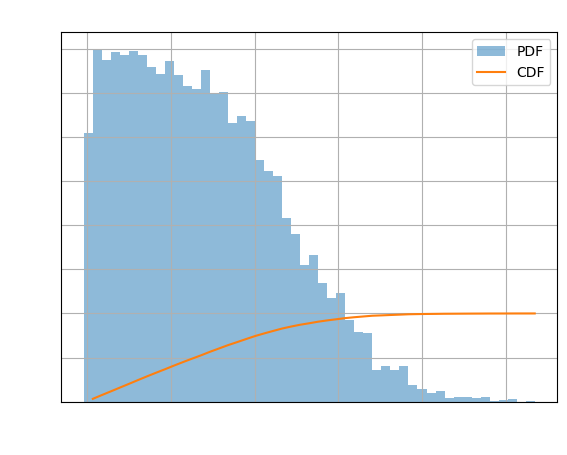

Statistics for Distribution of NE1&NE2&E3:
  Mean: 0.14
  Median: 0.13
  Standard Deviation: 0.09
  25th percentile: 0.06
  75th percentile: 0.20


In [16]:
outcome_title = "NE1&NE2&E3"

def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [NE1,NE2,E3], combine_formula,  lambda x: 2*x)
outcome7=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


### Outcome 8: NE1&NE2&NE3

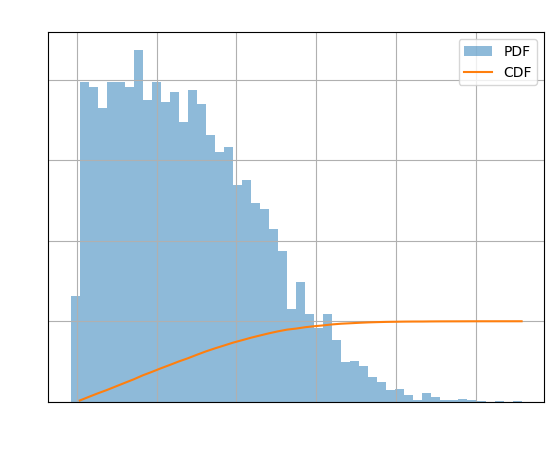

Statistics for Distribution of NE1&NE2&NE3:
  Mean: 0.14
  Median: 0.13
  Standard Deviation: 0.09
  25th percentile: 0.06
  75th percentile: 0.20


In [17]:
outcome_title = "NE1&NE2&NE3"

def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title,  decision2, [NE1,NE2,NE3], combine_formula,  lambda x: x)
outcome8=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)


# Step 7: Evaluate Decisions

In [18]:
all_outcomes = [outcome1, outcome2, outcome3, outcome4, outcome5, outcome6, outcome7, outcome8]

## Decision 1

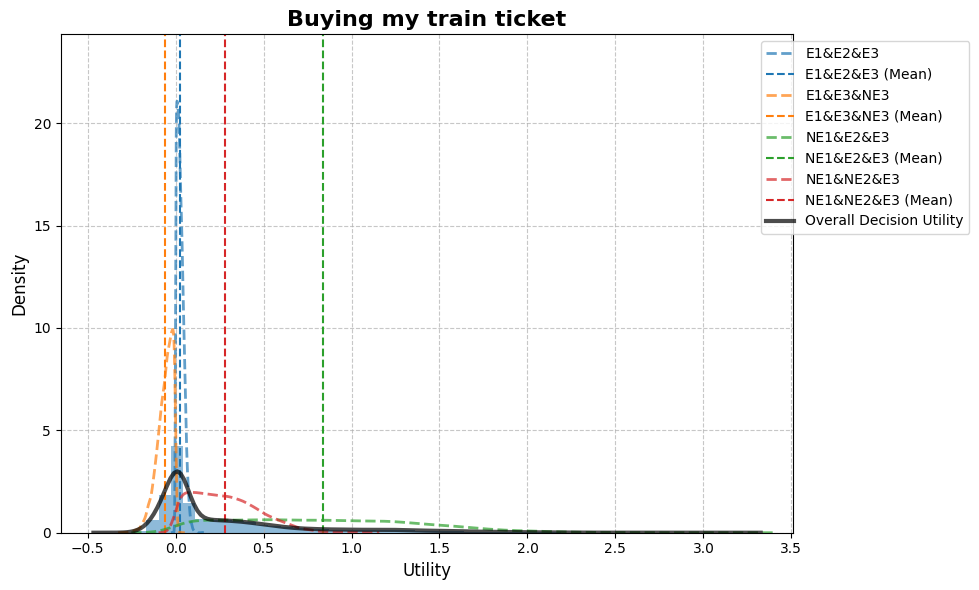

Statistics for Overall Decision Utility:
  Mean: 0.27
  Median: 0.05
  Standard Deviation: 0.45
  25th percentile: 0.00
  75th percentile: 0.40


In [19]:
decision1.add_outcome(outcome1)
decision1.add_outcome(outcome3)
decision1.add_outcome(outcome5)
decision1.add_outcome(outcome7)
final_utilities, weighted_average_utility, all_utility_samples = evaluate_decision(decision1.get_outcomes())
plot_decision_utility_distribution(decision1, all_utility_samples,decision1.name, colors=None, fig_size=(10, 6))

## Decision 2

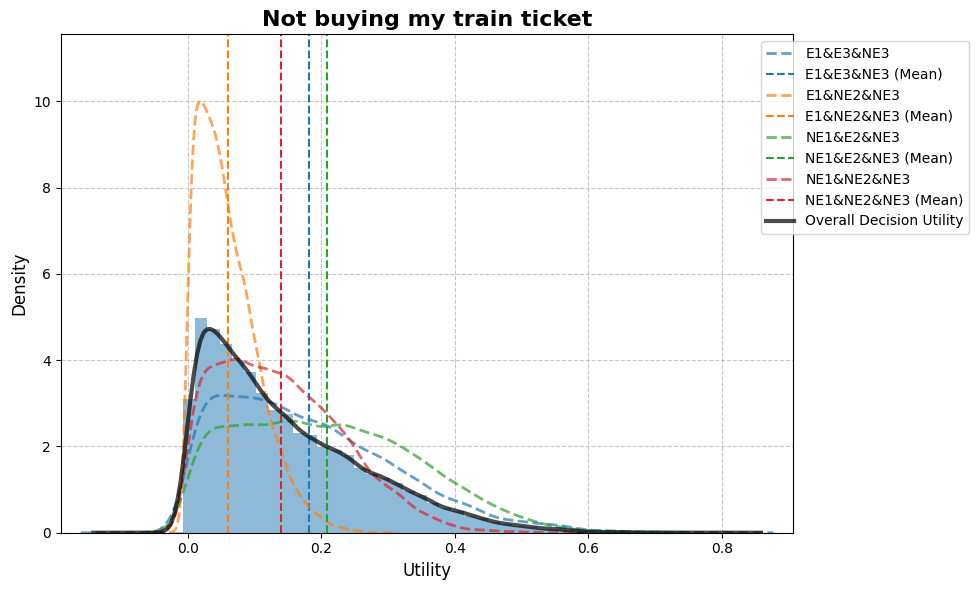

Statistics for Overall Decision Utility:
  Mean: 0.15
  Median: 0.12
  Standard Deviation: 0.12
  25th percentile: 0.05
  75th percentile: 0.22


In [20]:
decision2.add_outcome(outcome2)
decision2.add_outcome(outcome4)
decision2.add_outcome(outcome6)
decision2.add_outcome(outcome8)
final_utilities, weighted_average_utility, all_utility_samples = evaluate_decision(decision2.get_outcomes())
plot_decision_utility_distribution(decision2, all_utility_samples,decision2.name, colors=None, fig_size=(10, 6))

In [21]:
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Total time elapsed: {elapsed_time:.2f} seconds")

Total time elapsed: 7.61 seconds
